# WRF

Results from [WRF](https://www2.mmm.ucar.edu/wrf/) Weather Research & Forecasting Model using the [WRFV3 benchmarks](https://www2.mmm.ucar.edu/wrf/WG2/benchv3/).

In [8]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, display_markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show:
- `runtime_real` (s): Wallclock time for the entire MPI job.
- `av_time_per_step`: TODO

Lower values are better performance. 

### WRF: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,60.597,58.601
2,43.732,36.900
4,35.167,29.614
8,19.794,87.581
16,18.038,85.484
32,62.179,22.979
56,19.970,26.290


### WRF: gflops

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,99.793247,100.317080
2,210.036569,209.503390
4,395.676864,389.205630
8,769.853870,729.099205
16,1095.954262,928.157440
32,1467.543951,1152.270517
56,1451.650246,1040.169952


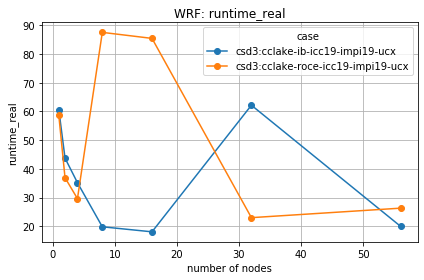

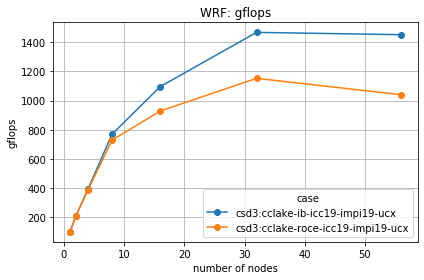

In [31]:
for var in ['runtime_real', 'gflops']:
    df = modules.utils.tabulate_last_perf('WRF*', 'num_nodes', var)
    if df is None:
        print('%s: no data found' % var)
        continue
    title = 'WRF: %s' % var
    display_markdown('### %s' % title, raw=True)
    display(df)
    ax = df.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel(var)
    ax.set_title(title)
    plt.tight_layout()